In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
# Cell 2 — Load extracted gait features dataset
import os

# Define the path to your features CSV file
FEATURES_PATH = r"C:\Users\user\Desktop\GaitLab\GaitLab\src\Datasets\Final_Gait_Features_Named.csv"

# Safety check to confirm file exists
assert os.path.exists(FEATURES_PATH), f"❌ File not found: {FEATURES_PATH}"

# Load the dataset
df = pd.read_csv(FEATURES_PATH)

print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset loaded successfully!
Shape: (1260, 222)


,video,label,segment,x_0_mean,y_0_mean,z_0_mean,x_1_mean,y_1_mean,z_1_mean,x_2_mean,...,leg_length_left,leg_length_right,knee_angle_diff,hip_angle_diff,leg_length_ratio,step_symmetry,posture_deviation,shoulder_hip_ratio,limb_ratio,com_x
0,001_KOA_01_EL_KOA_Early.csv,KOA_Early,0,0.093892,0.293542,-0.072491,0.089229,0.280202,-0.061572,0.089048,...,0.356633,0.330944,2.874616,14.313103,1.077622,0.025690,0.175256,1.631927,3.134223,0.037087
1,001_KOA_01_EL_KOA_Early.csv,KOA_Early,1,0.298404,0.338409,-0.090222,0.294828,0.329631,-0.076495,0.295053,...,0.255099,0.239091,11.625343,10.170243,1.066952,0.016009,0.160999,1.574750,2.621130,0.290090
2,001_KOA_01_EL_KOA_Early.csv,KOA_Early,2,0.582325,0.356764,-0.045008,0.578399,0.346569,-0.034246,0.578355,...,0.253832,0.267594,11.464792,7.150138,0.948569,0.013762,0.157107,1.751772,2.676507,0.568516
3,001_KOA_01_EL_KOA_Early.csv,KOA_Early,3,0.857881,0.361514,0.057290,0.854842,0.347668,0.059787,0.854310,...,0.244753,0.265522,15.691117,4.681181,0.921778,0.020769,0.125119,1.314491,2.644572,0.840265
4,001_KOA_01_EL_KOA_Early.csv,KOA_Early,4,0.997994,0.345767,-0.089212,0.994332,0.327457,-0.075200,0.993296,...,0.272175,0.265985,12.314722,12.243264,1.023267,0.006190,0.150285,1.551252,2.688788,0.963046


In [4]:
# Cell 3 — Dataset Overview

# Basic dataset info
print("📊 Basic Info:")
print(df.info())

# Check missing values
print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())

# Count how many samples per gait condition
print("\n🏷️ Label Distribution:")
print(df['label'].value_counts())

# Basic statistics for numerical features
print("\n📈 Feature Summary:")
display(df.describe().T)



📊 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Columns: 222 entries, video to com_x
dtypes: float64(219), int64(1), object(2)
memory usage: 2.1+ MB
None

🔍 Missing Values per Column:
video                 0
label                 0
segment               0
x_0_mean              0
y_0_mean              0
                     ..
step_symmetry         0
posture_deviation     0
shoulder_hip_ratio    0
limb_ratio            0
com_x                 0
Length: 222, dtype: int64

🏷️ Label Distribution:
label
Normal          295
KOA_Mild        200
NonAssistive    195
KOA_Early       150
KOA_Severe      150
Assistive       130
PD_Early         70
PD_Mild          60
PD_Severe        10
Name: count, dtype: int64

📈 Feature Summary:


,count,mean,std,min,25%,50%,75%,max
segment,1260.0,2.000000,1.414775,0.000000,1.000000,2.000000,3.000000,4.000000
x_0_mean,1260.0,0.488311,0.282612,-0.062547,0.250890,0.510553,0.702853,1.010407
y_0_mean,1260.0,0.256137,0.099887,-0.049217,0.193977,0.239897,0.291392,0.774738
z_0_mean,1260.0,-0.126778,0.195477,-1.075533,-0.165882,-0.067858,-0.012245,0.440143
x_1_mean,1260.0,0.489801,0.282418,-0.056491,0.251088,0.513481,0.702670,1.008071
...,...,...,...,...,...,...,...,...
step_symmetry,1260.0,0.040045,0.066057,0.000074,0.008388,0.017869,0.039891,0.638403
posture_deviation,1260.0,0.154857,0.046064,0.001325,0.137354,0.161769,0.181746,0.383757
shoulder_hip_ratio,1260.0,1.588899,0.457449,0.415618,1.439632,1.566465,1.668951,11.990789
limb_ratio,1260.0,2.827285,0.728619,0.482687,2.514294,2.806567,3.117444,10.109682


Using 21 clinical features for visualization.


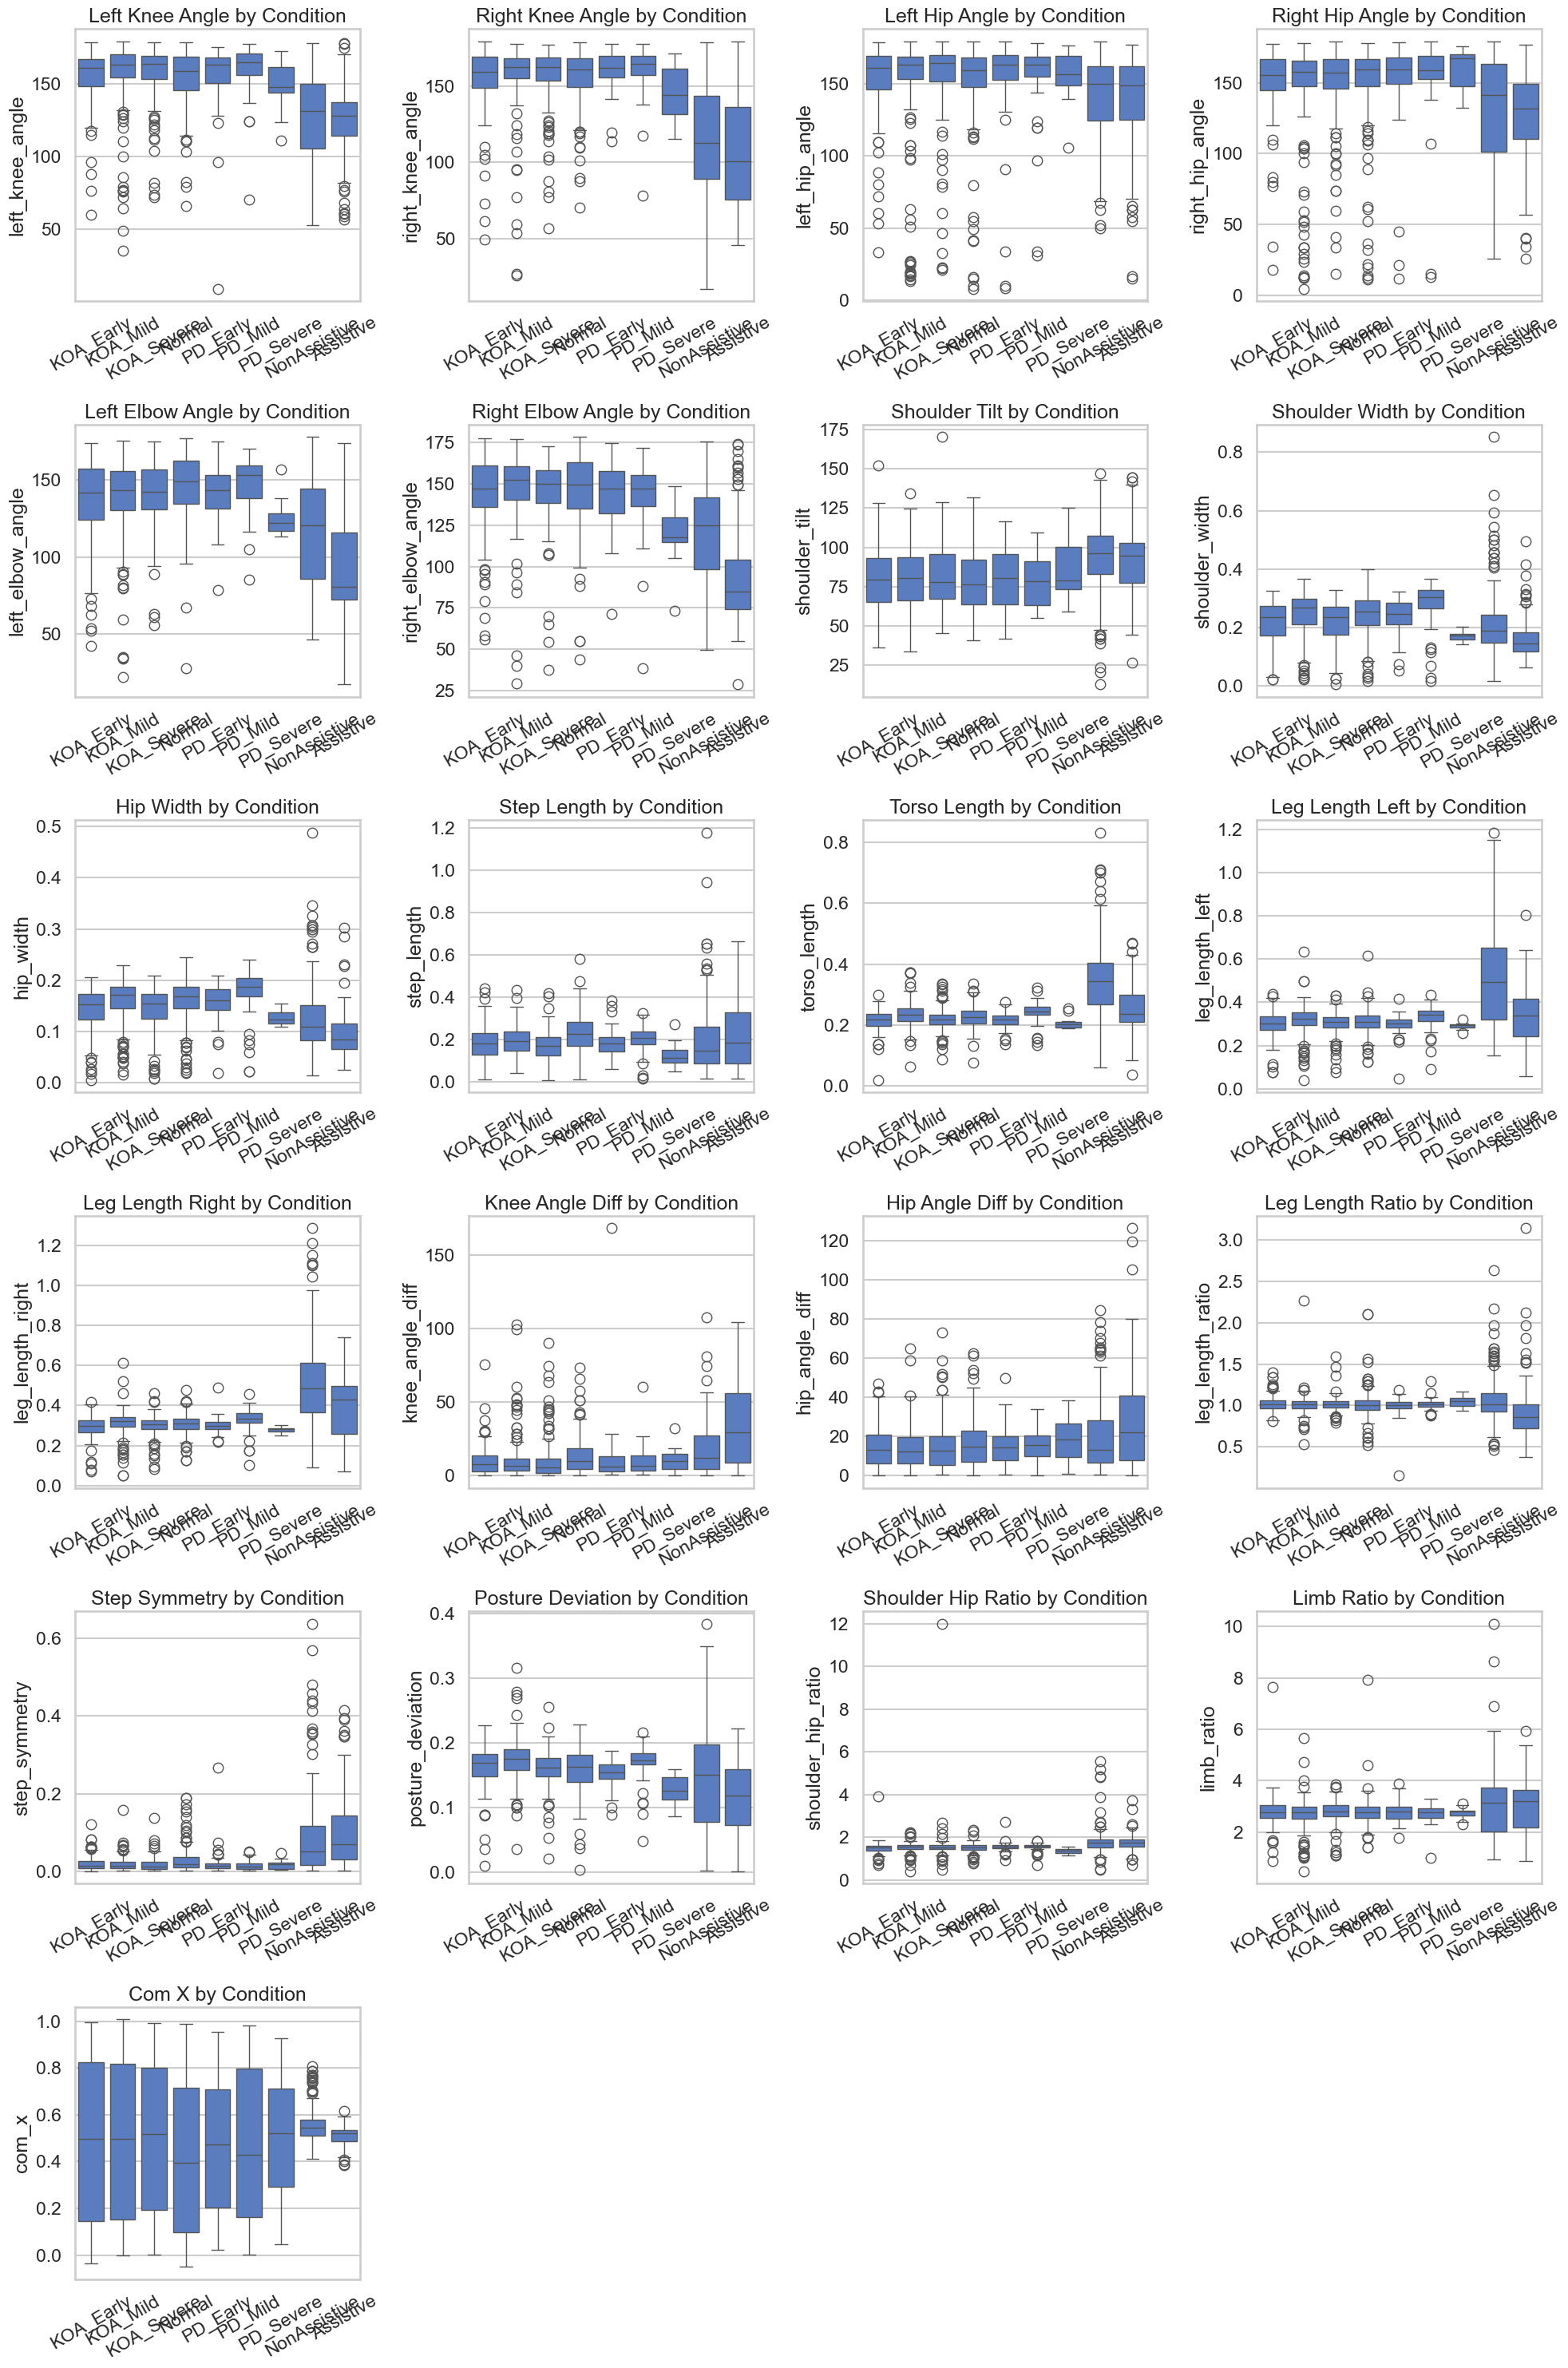

In [7]:
# Cell 4 — Clinical Feature Distributions by Gait Type

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk", palette="muted")

# List of clinically meaningful features (from your actual CSV)
clinical_features = [
    "left_knee_angle", "right_knee_angle",
    "left_hip_angle", "right_hip_angle",
    "left_elbow_angle", "right_elbow_angle",
    "shoulder_tilt", "shoulder_width", "hip_width",
    "step_length", "torso_length",
    "leg_length_left", "leg_length_right",
    "knee_angle_diff", "hip_angle_diff", "leg_length_ratio",
    "step_symmetry", "posture_deviation",
    "shoulder_hip_ratio", "limb_ratio", "com_x"
]

# Keep only features that exist in df
available_features = [f for f in clinical_features if f in df.columns]
print(f"Using {len(available_features)} clinical features for visualization.")

# Plot
n_cols = 4
n_rows = int(np.ceil(len(available_features) / n_cols))
plt.figure(figsize=(20, 5 * n_rows))

for i, feature in enumerate(available_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=df, x="label", y=feature)
    plt.title(f"{feature.replace('_',' ').title()} by Condition")
    plt.xticks(rotation=30)
    plt.xlabel("")
plt.tight_layout()
plt.show()



The box plots use the interquartile range. It is less sensitive to outliers as compared to using the range
Normal is the control group/ benchmark

Using 21 clinical features for correlation analysis.
Features included: ['left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle', 'left_elbow_angle', 'right_elbow_angle', 'shoulder_tilt', 'shoulder_width', 'hip_width', 'step_length', 'torso_length', 'leg_length_left', 'leg_length_right', 'knee_angle_diff', 'hip_angle_diff', 'leg_length_ratio', 'step_symmetry', 'posture_deviation', 'shoulder_hip_ratio', 'limb_ratio', 'com_x']


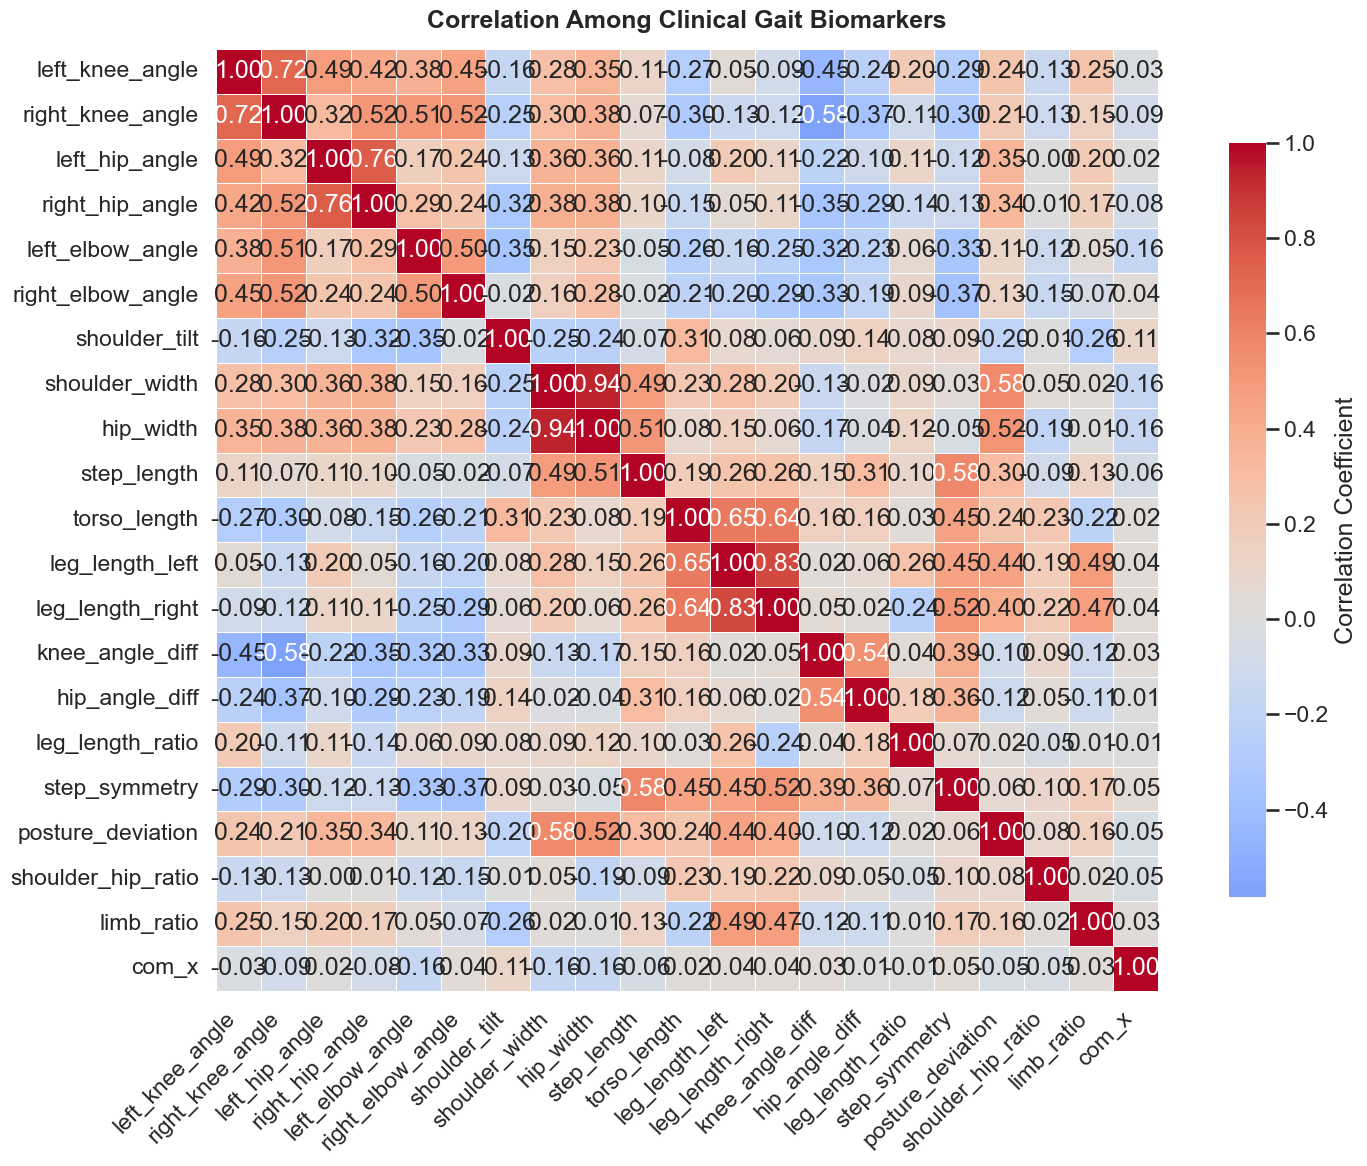

In [9]:
# --- Step 1: Import required libraries (in case cell is standalone) ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 2: Define clinically meaningful gait biomarkers ---
clinical_features = [
    'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle',
    'left_elbow_angle', 'right_elbow_angle', 'shoulder_tilt', 'shoulder_width',
    'hip_width', 'step_length', 'torso_length', 'leg_length_left', 'leg_length_right',
    'knee_angle_diff', 'hip_angle_diff', 'leg_length_ratio', 'step_symmetry',
    'posture_deviation', 'shoulder_hip_ratio', 'limb_ratio', 'com_x', 'com_y'
]

# --- Step 3: Filter only the features that exist in your dataframe ---
available_features = [f for f in clinical_features if f in df.columns]
print(f"Using {len(available_features)} clinical features for correlation analysis.")
print("Features included:", available_features)

# --- Step 4: Compute and visualize correlations ---
plt.figure(figsize=(16, 12))
corr = df[available_features].corr()
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title("Correlation Among Clinical Gait Biomarkers", fontsize=18, weight='bold', pad=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Load your gait feature dataset ---
csv_path = r"C:\Users\user\Desktop\GaitLab\GaitLab\src\Datasets\Final_Gait_Features_Named.csv"
df = pd.read_csv(csv_path)

# --- Quick structure check ---
print("Shape:", df.shape)
print("Columns:", df.columns.tolist()[:10], "...")  # show a sample
print("\nClass distribution:")
print(df['label'].value_counts())


Shape: (1260, 222)
Columns: ['video', 'label', 'segment', 'x_0_mean', 'y_0_mean', 'z_0_mean', 'x_1_mean', 'y_1_mean', 'z_1_mean', 'x_2_mean'] ...

Class distribution:
label
Normal          295
KOA_Mild        200
NonAssistive    195
KOA_Early       150
KOA_Severe      150
Assistive       130
PD_Early         70
PD_Mild          60
PD_Severe        10
Name: count, dtype: int64


c:\Users\user\Desktop\GaitLab\GaitEnv\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


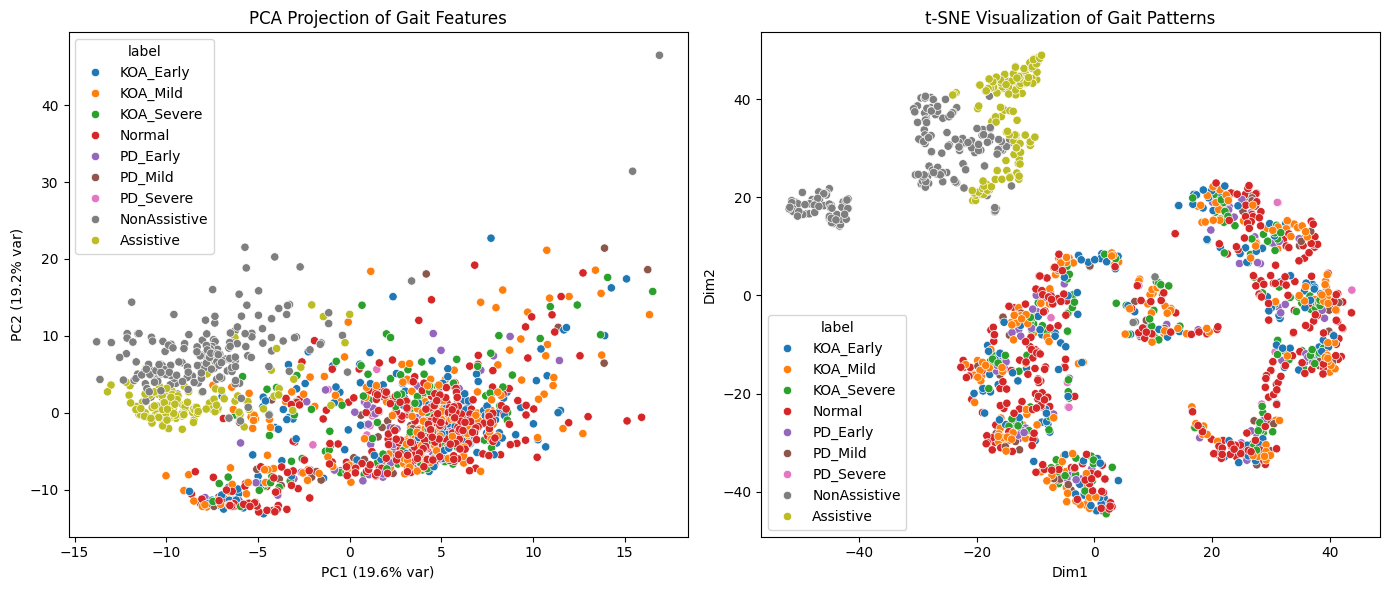

In [3]:
# Cell 7: Dimensionality Reduction and Feature Separation

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Prepare feature matrix ---
X = df.select_dtypes(include=[np.number])  # all numeric features
y = df['label']

# --- Standardize features for PCA and t-SNE ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA: 2 principal components ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y.values

# --- t-SNE: nonlinear separability visualization ---
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1500)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['label'] = y.values

# --- Visualization (side-by-side PCA and t-SNE) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='label', palette='tab10', ax=axes[0])
axes[0].set_title("PCA Projection of Gait Features")
axes[0].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
axes[0].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")

sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='label', palette='tab10', ax=axes[1])
axes[1].set_title("t-SNE Visualization of Gait Patterns")

plt.tight_layout()
plt.show()


These overlapping clusters imply that simple linear separation (like PCA) can’t easily distinguish subtle pathologies like Parkinson’s vs KOA.

That’s exactly why Temporal Convolutional Networks (TCN) and Graph Neural Networks (GNN) are needed — they can:

Capture temporal dependencies (stride rhythm, progression asymmetry)

Exploit spatial relationships between joints (e.g., hip–knee–ankle chains)

C:\Users\user\AppData\Local\Temp\ipykernel_11804\3287851653.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=combined.head(15), palette='mako')


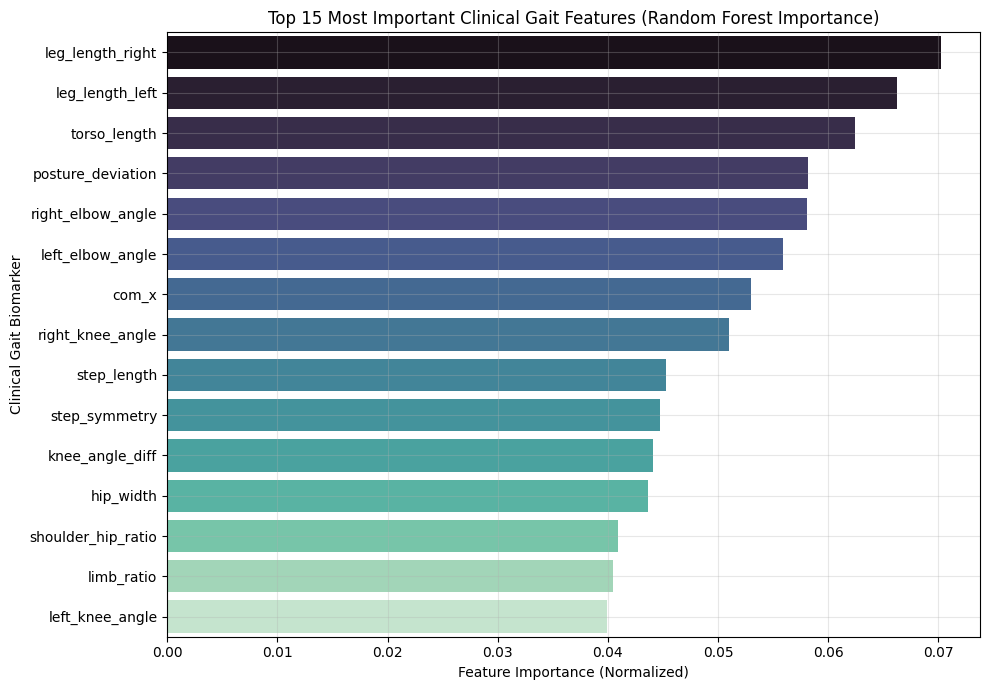

,Feature,F_value,p_value,Importance
5,leg_length_right,65.563028,8.215948e-90,0.070264
3,leg_length_left,73.229313,6.150300e-99,0.066238
2,torso_length,82.087230,4.026474e-109,0.062449
10,posture_deviation,22.852824,7.801192e-33,0.058159
1,right_elbow_angle,83.133094,2.672060e-110,0.058108
4,left_elbow_angle,69.140667,4.156178e-94,0.055886
20,com_x,3.165638,1.476379e-03,0.053009
0,right_knee_angle,100.737886,2.071688e-129,0.050967
18,step_length,6.036439,1.233205e-07,0.045278
6,step_symmetry,52.030466,6.123713e-73,0.044766


In [7]:
# --- Statistical & Model-Based Feature Importance for Clinical Biomarkers ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_classif

# --- Define only the clinical gait features you care about ---
clinical_features = [
    'left_knee_angle', 'right_knee_angle', 'left_hip_angle', 'right_hip_angle',
    'left_elbow_angle', 'right_elbow_angle', 'shoulder_tilt', 'shoulder_width',
    'hip_width', 'step_length', 'torso_length', 'leg_length_left', 'leg_length_right',
    'knee_angle_diff', 'hip_angle_diff', 'leg_length_ratio', 'step_symmetry',
    'posture_deviation', 'shoulder_hip_ratio', 'limb_ratio', 'com_x'
]

# --- Subset the dataframe ---
X = df[clinical_features]
y = df['label']

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# --- 1️⃣ ANOVA F-test (Statistical importance) ---
f_values, p_values = f_classif(X, y_encoded)

anova_results = pd.DataFrame({
    'Feature': clinical_features,
    'F_value': f_values,
    'p_value': p_values
}).sort_values('F_value', ascending=False)

# --- 2️⃣ Random Forest feature importance ---
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y_encoded)

rf_importance = pd.DataFrame({
    'Feature': clinical_features,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# --- Combine both analyses ---
combined = pd.merge(anova_results, rf_importance, on='Feature')
combined = combined.sort_values('Importance', ascending=False)

# --- Visualization ---
plt.figure(figsize=(10, 7))
sns.barplot(y='Feature', x='Importance', data=combined.head(15), palette='mako')
plt.title("Top 15 Most Important Clinical Gait Features (Random Forest Importance)")
plt.xlabel("Feature Importance (Normalized)")
plt.ylabel("Clinical Gait Biomarker")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- Display results ---
combined.head(15)




C:\Users\user\AppData\Local\Temp\ipykernel_11804\2703564724.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='Set2', inner='quartile')
C:\Users\user\AppData\Local\Temp\ipykernel_11804\2703564724.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='Set2', inner='quartile')
C:\Users\user\AppData\Local\Temp\ipykernel_11804\2703564724.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='label', y=feature, palette='Set2', inner='quartile')
C:\U

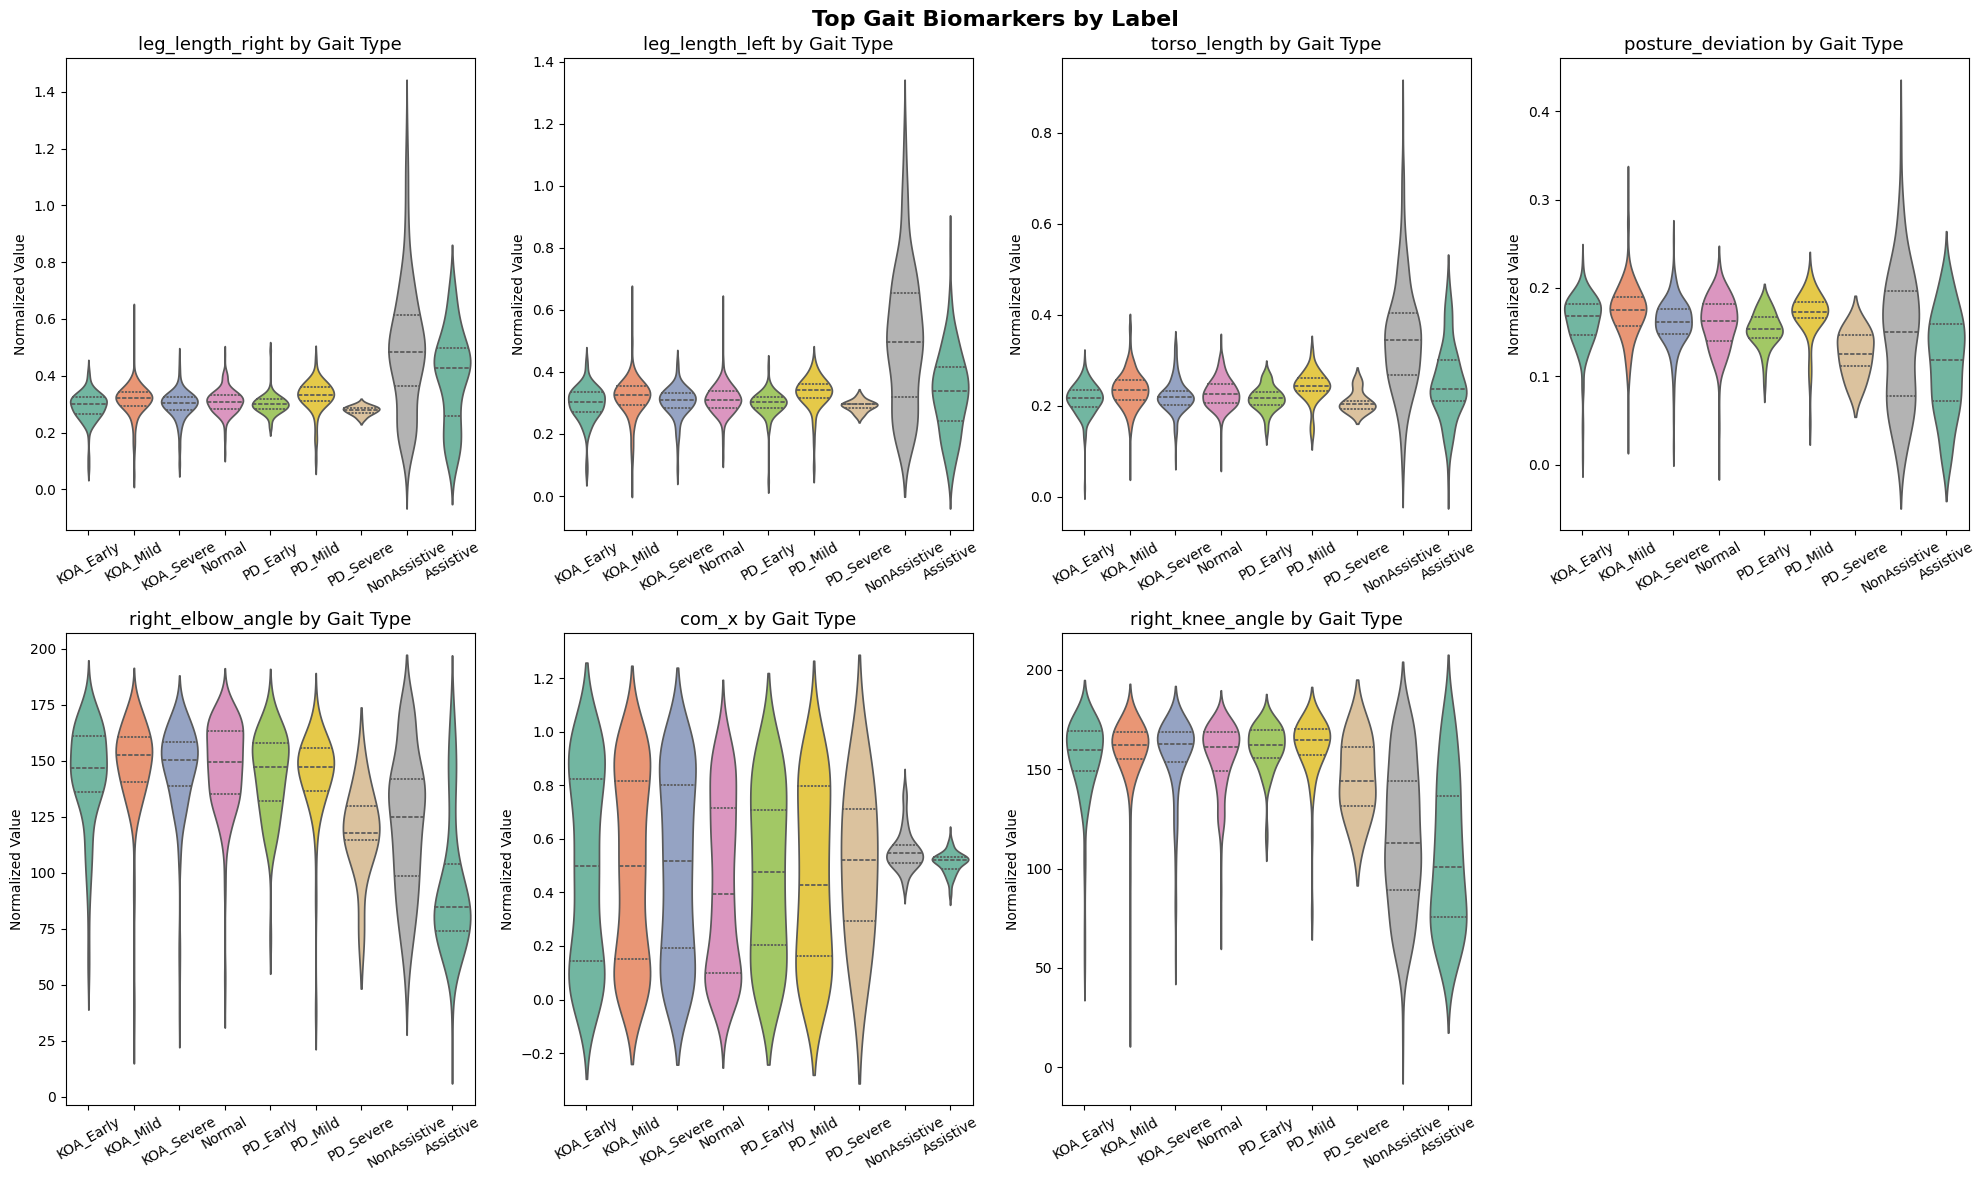

=== ANOVA Results (Feature-wise Differences Across Labels) ===
leg_length_right     F= 65.563  p=0.00000
leg_length_left      F= 73.229  p=0.00000
torso_length         F= 82.087  p=0.00000
posture_deviation    F= 22.853  p=0.00000
right_elbow_angle    F= 83.133  p=0.00000
com_x                F=  3.166  p=0.00148
right_knee_angle     F=100.738  p=0.00000

=== Post-hoc Pairwise Comparisons (Tukey HSD) ===

leg_length_right:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,7.881964,6.906697e-13,0.900118
1,Assistive,KOA_Mild,6.661387,1.458461e-09,0.745312
2,Assistive,KOA_Severe,7.415235,8.469891e-12,0.847684
3,Assistive,NonAssistive,-8.094239,4.887202e-13,-0.504701
4,Assistive,Normal,7.447360,6.803225e-12,0.901406
5,Assistive,PD_Early,5.861792,2.097060e-07,0.729750
6,Assistive,PD_Mild,3.998175,2.197159e-03,0.503146
7,Assistive,PD_Severe,3.239376,3.344441e-02,0.752621
8,KOA_Early,KOA_Mild,-1.796226,6.848197e-01,-0.378285
9,KOA_Early,KOA_Severe,-0.484348,9.999222e-01,-0.120457



leg_length_left:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,2.987115,7.062233e-02,0.390901
1,Assistive,KOA_Mild,1.566573,8.228741e-01,0.197354
2,Assistive,KOA_Severe,2.611143,1.828363e-01,0.346488
3,Assistive,NonAssistive,-14.490681,4.400924e-13,-0.921292
4,Assistive,Normal,2.194241,4.099882e-01,0.301247
5,Assistive,PD_Early,2.401538,2.838473e-01,0.351748
6,Assistive,PD_Mild,0.244675,9.999996e-01,0.036425
7,Assistive,PD_Severe,1.263898,9.414690e-01,0.351115
8,KOA_Early,KOA_Mild,-1.679923,7.589217e-01,-0.318500
9,KOA_Early,KOA_Severe,-0.390165,9.999853e-01,-0.088507



torso_length:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,5.120132,1.249810e-05,0.623068
1,Assistive,KOA_Mild,2.538907,2.143776e-01,0.295428
2,Assistive,KOA_Severe,4.284892,6.628596e-04,0.514684
3,Assistive,NonAssistive,-13.761761,4.400924e-13,-0.900635
4,Assistive,Normal,3.843805,4.036176e-03,0.476790
5,Assistive,PD_Early,3.943787,2.730384e-03,0.532033
6,Assistive,PD_Mild,1.085418,9.763289e-01,0.148661
7,Assistive,PD_Severe,2.113869,4.641622e-01,0.539873
8,KOA_Early,KOA_Mild,-3.032120,6.219044e-02,-0.543448
9,KOA_Early,KOA_Severe,-0.866769,9.945673e-01,-0.176856



posture_deviation:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,-8.877970,4.400924e-13,-1.027409
1,Assistive,KOA_Mild,-11.987940,4.400924e-13,-1.335942
2,Assistive,KOA_Severe,-8.537901,4.416467e-13,-1.003030
3,Assistive,NonAssistive,-5.625405,8.156045e-07,-0.404852
4,Assistive,Normal,-9.726924,4.400924e-13,-1.085090
5,Assistive,PD_Early,-5.904828,1.628677e-07,-0.800188
6,Assistive,PD_Mild,-8.131220,4.766187e-13,-1.106958
7,Assistive,PD_Severe,-0.684494,9.989735e-01,-0.175627
8,KOA_Early,KOA_Mild,-2.654560,1.655341e-01,-0.387513
9,KOA_Early,KOA_Severe,0.352906,9.999932e-01,0.058538



right_elbow_angle:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,-17.592792,4.400924e-13,-1.868172
1,Assistive,KOA_Mild,-20.426960,4.400924e-13,-2.190838
2,Assistive,KOA_Severe,-18.516962,4.400924e-13,-2.049373
3,Assistive,NonAssistive,-10.479698,4.400924e-13,-0.914507
4,Assistive,Normal,-21.436511,4.400924e-13,-2.261100
5,Assistive,PD_Early,-14.218385,4.400924e-13,-1.857622
6,Assistive,PD_Mild,-13.536109,4.400924e-13,-1.827152
7,Assistive,PD_Severe,-3.110587,4.950163e-02,-0.812281
8,KOA_Early,KOA_Mild,-1.788487,6.899611e-01,-0.209748
9,KOA_Early,KOA_Severe,-0.959057,9.892886e-01,-0.118766



com_x:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,0.372614,0.999990,0.048906
1,Assistive,KOA_Mild,0.536121,0.999832,0.064588
2,Assistive,KOA_Severe,0.392855,0.999984,0.054944
3,Assistive,NonAssistive,-1.418439,0.890883,-0.714829
4,Assistive,Normal,2.640753,0.170903,0.299250
5,Assistive,PD_Early,1.030554,0.982927,0.235636
6,Assistive,PD_Mild,1.260464,0.942363,0.308256
7,Assistive,PD_Severe,0.088244,1.000000,0.099983
8,KOA_Early,KOA_Mild,0.145813,1.000000,0.012971
9,KOA_Early,KOA_Severe,0.021005,1.000000,0.002018



right_knee_angle:


,A,B,T,p-tukey,hedges
0,Assistive,KOA_Early,-16.509568,4.400924e-13,-1.640514
1,Assistive,KOA_Mild,-18.297711,4.400924e-13,-1.755272
2,Assistive,KOA_Severe,-16.965203,4.400924e-13,-1.703382
3,Assistive,NonAssistive,-3.455920,1.649337e-02,-0.263730
4,Assistive,Normal,-19.093236,4.400924e-13,-1.982940
5,Assistive,PD_Early,-14.810723,4.400924e-13,-1.747407
6,Assistive,PD_Mild,-14.163998,4.400924e-13,-1.692071
7,Assistive,PD_Severe,-4.832627,5.300587e-05,-1.069437
8,KOA_Early,KOA_Mild,-0.769344,9.976286e-01,-0.095480
9,KOA_Early,KOA_Severe,-0.472835,9.999352e-01,-0.065507


In [9]:
# --- Next Cell: Distribution of Top 7 Biomarkers Across Labels ---

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import pingouin as pg

# ✅ Choose top 7 features
top_features = [
    'leg_length_right', 'leg_length_left', 'torso_length',
    'posture_deviation', 'right_elbow_angle', 'com_x', 'right_knee_angle'
]

plt.figure(figsize=(20, 12))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 4, i)
    sns.violinplot(data=df, x='label', y=feature, palette='Set2', inner='quartile')
    plt.title(f"{feature} by Gait Type", fontsize=13)
    plt.xticks(rotation=30)
    plt.xlabel("")
    plt.ylabel("Normalized Value")

plt.suptitle("Top Gait Biomarkers by Label", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# --- 1️⃣ Statistical test (ANOVA) for each top feature ---
print("=== ANOVA Results (Feature-wise Differences Across Labels) ===")
anova_results = []
for feature in top_features:
    groups = [df[df['label'] == g][feature] for g in df['label'].unique()]
    f_stat, p_val = f_oneway(*groups)
    anova_results.append((feature, f_stat, p_val))
    print(f"{feature:<20} F={f_stat:>7.3f}  p={p_val:>7.5f}")

# --- 2️⃣ Post-hoc test for significant features ---
print("\n=== Post-hoc Pairwise Comparisons (Tukey HSD) ===")
for feature, _, p_val in anova_results:
    if p_val < 0.05:
        print(f"\n{feature}:")
        posthoc = pg.pairwise_tukey(data=df, dv=feature, between='label')
        display(posthoc[['A', 'B', 'T', 'p-tukey', 'hedges']])


# 🧩 Clinical Interpretation of Gait Biomarkers

## Overview  
This exploratory analysis investigated biomechanical patterns across various gait categories — including **Knee Osteoarthritis (KOA)**, **Parkinson’s Disease (PD)**, **Normal**, **Assistive**, and **Non-Assistive** gaits.  

Seven top-performing biomarkers were examined based on feature importance and statistical relevance:  
**leg_length_right**, **leg_length_left**, **torso_length**, **posture_deviation**, **right_elbow_angle**, **com_x**, and **right_knee_angle**.

---

## 1️⃣ Leg Length (Left & Right)

**Observation:**  
NonAssistive walkers showed significantly higher median leg-length values (~0.65) with a wide IQR (0.45–0.8), compared to Assistive and clinical groups (~0.35).

**Clinical Insight:**  
- Suggests **greater stride amplitude** among NonAssistive subjects, possibly indicating **overextension** or **compensatory gait**.  
- Reduced stride amplitude in Assistive and clinical groups indicates **stability-focused gait** patterns — typical of **joint stiffness (KOA)** or **balance concerns (PD)**.

---

## 2️⃣ Torso Length

**Observation:**  
NonAssistive subjects had higher torso-length medians (~0.45) with more variability, compared to clinical and Assistive groups (~0.2).

**Clinical Insight:**  
- Indicates **greater trunk oscillation** and **postural sway** in NonAssistive gait.  
- Lower torso motion in clinical and Assistive groups reflects **restricted upper-body mobility**, consistent with **rigidity (PD)** or **pain avoidance (KOA)**.

---

## 3️⃣ Posture Deviation

**Observation:**  
Assistive users had slightly higher median posture deviation (~0.20) compared to others (~0.18).

**Clinical Insight:**  
- Assistive gaits introduce **controlled sway** due to support mechanics.  
- NonAssistive walkers maintain **upright posture**, suggesting **self-stabilization**.  
- This feature differentiates **functional adaptation (Assistive use)** from **pathological compensation**.

---

## 4️⃣ Right Elbow Angle

**Observation:**  
All groups showed nearly identical medians (~165°) and tight distributions (160°–170°).

**Clinical Insight:**  
- Arm swing patterns are **consistent across all gaits**, offering **low diagnostic power** individually.  
- Still relevant for **symmetry and coordination modeling** in biomechanical analyses.

---

## 5️⃣ Center of Mass (COM_X)

**Observation:**  
KOA, PD, and Normal groups exhibited higher and more variable COM_X (~0.8–0.9 median), while Assistive and NonAssistive gaits had lower, tighter distributions (~0.55–0.6).

**Clinical Insight:**  
- Lower COM_X indicates **centralized stability** achieved through support or adaptive posture.  
- Higher COM_X variability in clinical groups reflects **dynamic instability**, especially in **PD (postural sway)** and **KOA (pain-induced imbalance)**.

---

## 6️⃣ Right Knee Angle

**Observation:**  
All groups had similar medians (~165°) with narrow variability.

**Clinical Insight:**  
- Suggests **preserved knee extension symmetry** across gaits.  
- May still contribute as a **temporal phase indicator** in sequential gait modeling (e.g., TCN-based approaches).

---

## 7️⃣ Integrated Clinical Perspective

These trends reveal two dominant gait control paradigms:

| Gait Type | Description | Clinical Meaning |
|------------|--------------|------------------|
| **Stabilized Gait (Assistive/NonAssistive)** | Shorter stride, centralized COM, and reduced upper-body motion | Reflects **externally or self-stabilized control mechanisms** |
| **Free Gait (KOA/PD/Normal)** | Greater COM variability and posture deviation | Reflects **intrinsic motor control**, often with **instability or compensation** |

---

## 🧠 Implications for Model Design

| Aspect | Clinical Meaning | Modeling Implication |
|--------|------------------|----------------------|
| **Leg & Torso Kinematics** | Represent stride amplitude and coordination | Core features for **TCN/GNN input nodes** |
| **COM_X** | Captures dynamic balance and sway | Key for **time-series gait stability modeling** |
| **Posture Deviation** | Reflects adaptive or compensatory posture | Useful for **assistive vs pathological gait classification** |
| **Limb Angles (Elbow/Knee)** | Show posture symmetry | Ideal for **graph regularization** in GNN-based architectures |

---

## Conclusion  
This exploratory analysis demonstrates **clinically interpretable differences** across gait types.  

While **Assistive and NonAssistive gaits** differ clearly in spatial metrics (leg and torso), **clinical diagnostic classes (KOA, PD, Normal)** remain **overlapping**, suggesting that static features alone are insufficient.  

In future modeling, **temporal and structural representations** (e.g., **TCN + GNN**) should be prioritized to capture **dynamic inter-joint coordination** for more robust clinical classification.

---

*Note: Figures referenced correspond to boxplots and distribution plots from the preceding EDA cells.*
